# MLlab-7-2. Aprendizaje profundo para visión. (Google colab)

## Autor: David Ríos Insua

## **¡¡¡ IMPORTANTE: REVISAR QUE LA GPU ESTÁ ACTIVADA !!!**

Instalar libreria para medir tiempo

In [ ]:
install.packages('tictoc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tictoc)

Instalar librerias necesarias para el funcionamiento de Keras en Google Colab.

In [ ]:
tic()
install.packages('keras')
install.packages('tfdatasets')
install.packages('tfautograph')
install.packages('reticulate')
toc()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



120.194 sec elapsed


Cargar librerias para el lab.

In [ ]:
library(keras)
library(tfdatasets)
library(tfautograph)
library(reticulate)
library(purrr)


# Introducción

En este lab realizamos varios ejercicios en relación con 
con aprendizaje profundo y visión por ordenador
con ayuda de Keras. Hacemos una versión en PC pero la 
completaremos con una sesión en Google Colab.


# Recordatorio

Recuerda que hicimos ya un primer ejemplo con Keras.
Por si no lo hiciste, recuerda que has de cargarlo.

Copiamos lo que dijimos entonces. Echamos un ojito en  <https://blog.rstudio.com/2017/09/05/keras-for-r/> y 
<https://tensorflow.rstudio.com/tutorials/beginners/basic-ml/>. Más breve con 
help(Keras). Esencialmente
tenemos que instalarla el paquete Keras R, cargar el núcleo de keras y luego
con install_keras() cargamos también TensorFlow (esto se hace una vez, reinicializa
RStudio cuando lo hayas hecho lo comentas)


In [ ]:
help(keras)

## Ahora con una red convolutiva

En esta parte, repetimos el análisis con una red convolutiva.
Cargamos keras y definimos la función auxiliar.
Cargamos los datos. 
Todo como antes, pero lo ponemos otra vez por si estáis empezando por aquí.



In [ ]:
show_digit = function(img){
  img = t( apply(img, 2, rev) )
  image( img )
}

img_rows <- 28
img_cols <- 28

mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y


Aquí mostramos otra formas de aplanar las imágenes 
con array reshape de keras. Luego escalamos como antes. Y convertimos las etiquetas como antes.

In [ ]:
x_train <- array_reshape(x_train, c(nrow(x_train), img_rows, img_cols, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), img_rows, img_cols, 1))
input_shape <- c(img_rows, img_cols, 1)

x_train <- x_train / 255
x_test <- x_test / 255

cat('x_train_shape:', dim(x_train), '\n')
cat(nrow(x_train), 'train samples\n')
cat(nrow(x_test), 'test samples\n')

num_classes <- 10
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)

x_train_shape: 60000 28 28 1 
60000 train samples
10000 test samples


Pasamos ya a definir la red convolutiva profunda con estas 
características. 

1. Define una red convolutiva:

  1. Capa convolutiva de 32 filtros, kernel $3\times 3$ y activaciones ReLU
  2. Capa convolutiva de 64 filtros, kernel $3\times 3$ y activaciones ReLU
  3. Max pooling de tamaño $2 \times 2$
  4. Dropout ($0.25$)
  5. Capa densa de 128 unidades y activación ReLU
  6. Dropout ($0.5$)
  7. Capa de salida

Previa a la definción miramos los nuevos comandados.


In [ ]:
# help("layer_conv_2d")
# help("layer_max_pooling_2d")
# help("layer_flatten")
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',
                input_shape = input_shape) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = num_classes, activation = 'softmax')


Compilamos el modelo con Adam


In [ ]:
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

Entrenamos modelo durante 12 épocas, con tamaño de minibatch 128 y 20%
de split para validación.


`geom_smooth()` using formula 'y ~ x'



loss   accuracy 
0.03128691 0.99169999

61.439 sec elapsed


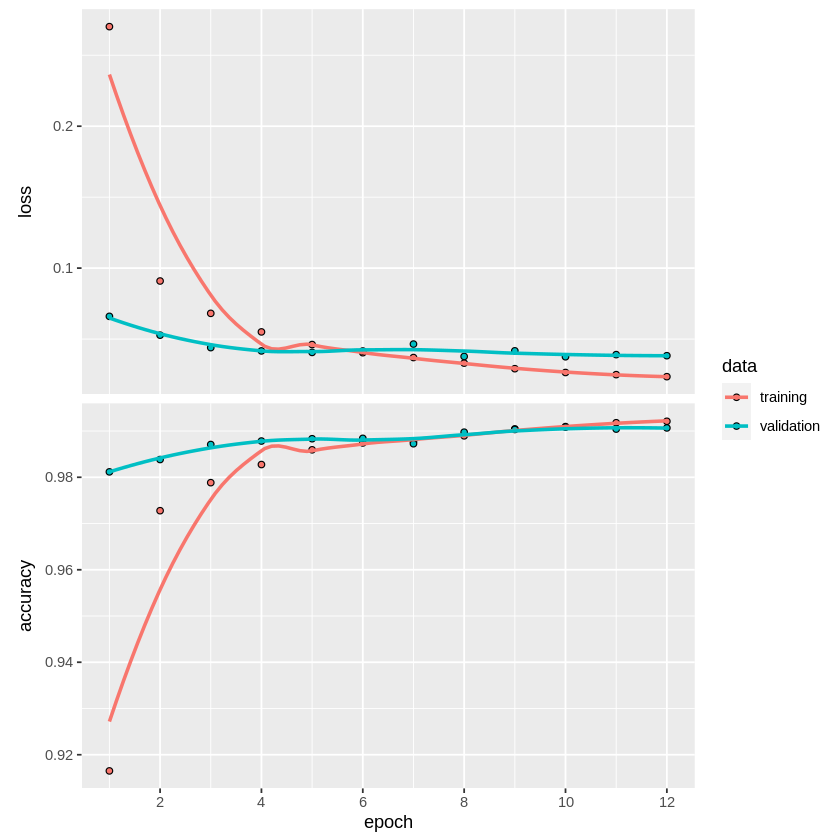

In [ ]:
tic()
batch_size <- 128
epochs <- 12
history<-model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = 0.2,
  verbose=2)

plot(history)

model %>% evaluate(x_test, y_test,verbose = 2)
toc()

NOTA: No se muestra en la interfaz el avance de las epochs como si pasa en local.